# Importing Libraries

In [33]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Datasset

In [34]:
#Importing dataset
df=pd.read_excel('Needy Paws Master.xlsx')
df.head(1)

,Name of Dog,Days in Rescue,Heartworm Positive,Breed,Sex,Age Group When Rescued,Color,Size
0,Aaron,30,N,Labrador,M,Young,Yellow,Medium


# Creating Percentiles to Fix Outliers

In [35]:
#Creating Percentiles
df1=pd.DataFrame(df['Days in Rescue'])
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Days in Rescue    44.0
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025D1707FBC8>]],
      dtype=object)

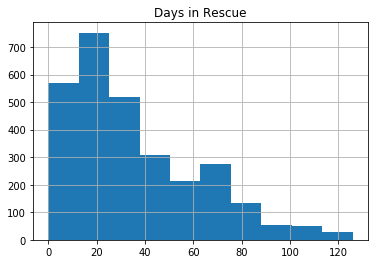

In [36]:
#Fixing Outliers
df1=pd.DataFrame(df['Days in Rescue'])
df1 = df1[~((df1 < (Q1 - 1.5 * IQR)) |(df1 > (Q3 + 1.5 * IQR))).any(axis=1)]
df=df.drop(['Days in Rescue'],axis=1)
df=df.join(df1)
df.hist()

# Ordering Columns

In [37]:
#Ordering Columns

column_names=['Name of Dog', 'Days in Rescue', 'Heartworm Positive', 'Breed', 'Sex',
       'Age Group When Rescued', 'Color', 'Size']
df = df.reindex(columns=column_names)
df.head(10)

,Name of Dog,Days in Rescue,Heartworm Positive,Breed,Sex,Age Group When Rescued,Color,Size
0,Aaron,30.0,N,Labrador,M,Young,Yellow,Medium
1,Abby,11.0,N,Dachshund,F,Adult,Tan,Small
2,Abby,31.0,N,Unknown,F,Adult,Brindle,Medium
3,Abby,47.0,N,Mixed Breed (Non-Pitbull),F,Puppy,Multicolor,Medium
4,Abby,83.0,N,Chihuahua,F,Adult,Tan,Small
5,Abby,90.0,N,Mastiff,F,Young,Red,Large
6,Abe,21.0,N,Shepherd,M,Young,Multicolor,Large
7,Abigail,64.0,N,Chihuahua,F,Puppy,Multicolor,Small
8,Abigail,NaN,N,Golden Retriever,F,Adult,Red,Medium
9,Abilene,76.0,N,Mixed Breed (Non-Pitbull),F,Puppy,Multicolor,Medium


# Cleaning Adoption Fee Column

In [38]:
#df['Adoption Fee'].unique()

In [39]:
#Cleaning Adoption Fee
#df['Adoption Fee']=df['Adoption Fee'].astype(float)
#df['Adoption Fee'] = df['Adoption Fee'].str.replace(r'\D', '')
#df['Adoption Fee'] = df['Adoption Fee'].str.replace('$', '')
#df['Adoption Fee'] = df['Adoption Fee'].replace({'\$': '', ',': ''}, regex=True).astype(float)

#df['Adoption Fee'].unique()

In [40]:
#df['Adoption Fee']=pd.to_numeric(df['Adoption Fee'])

# Creating Dummy Variables for Sex Column

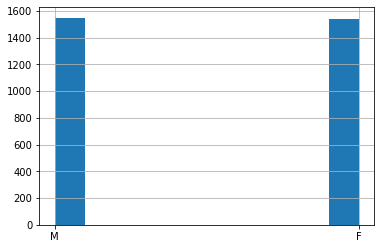

In [41]:
#sex column before dummy variables
df['Sex'].hist()

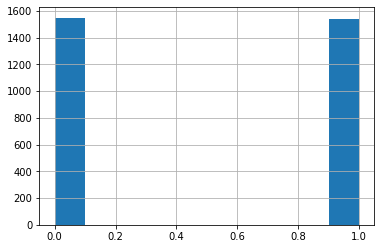

In [42]:
#Dummy Variables for Sex
df['Sex']=pd.get_dummies(df['Sex'])
df['Sex'].hist()

# Dummy Variables for Size Column

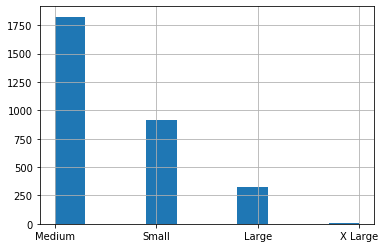

In [43]:
# Size Columb before Dummy Variables 
df['Size'].hist()

In [44]:
#Function to Create Dummy Variable
def dummy_variables(size):
    if size=="Small":
        return 0
    elif size=='Medium':
        return 1
    elif size=='Large':
        return 2
    elif size=='X Large':
        return 3
    
df['Size']=df['Size'].apply(dummy_variables)
df['Size']=pd.to_numeric(df['Size'])

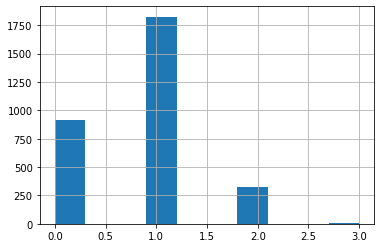

In [45]:
df['Size'].hist(bins=10)

# Dummy Variables for Age When Rescued Column

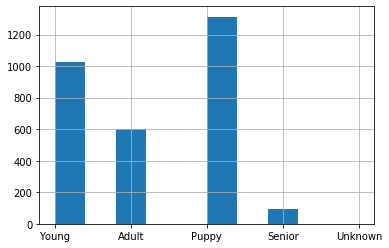

In [46]:
#Age when Rescued before Dummy Variables
df['Age Group When Rescued'].hist()

In [47]:
#Function Age When Rescued
def dummy_variables_age(size):
    if size=="Young":
        return 0
    elif size=='Adult':
        return 1
    elif size=='Puppy':
        return 2
    elif size=='Senior':
        return 3
    
df['Age Group When Rescued']=df['Age Group When Rescued'].apply(dummy_variables_age)
df['Age Group When Rescued']=pd.to_numeric(df['Age Group When Rescued'])

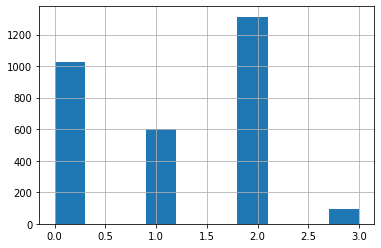

In [50]:
#Age when Rescued after Dummy Variables
df['Age Group When Rescued'].hist()

# Testing Correlation

In [48]:
df.corr()

,Days in Rescue,Sex,Age Group When Rescued,Size
Days in Rescue,1.000000,-0.017461,0.125791,0.055090
Sex,-0.017461,1.000000,0.019503,-0.049886
Age Group When Rescued,0.125791,0.019503,1.000000,0.007479
Size,0.055090,-0.049886,0.007479,1.000000


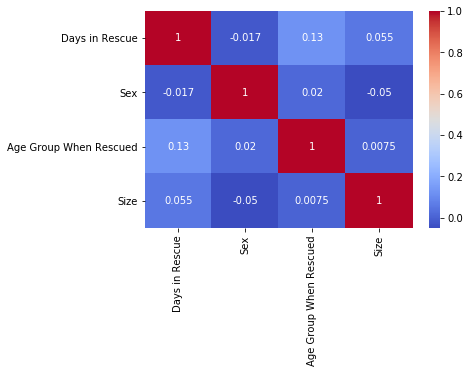

In [49]:
sns.heatmap(data=df.corr(), cmap='coolwarm', annot=True)

In [51]:
df.describe()

,Days in Rescue,Sex,Age Group When Rescued,Size
count,2898.000000,3088.000000,3032.000000,3069.000000
mean,35.389924,0.498381,1.155343,0.813620
std,26.605917,0.500078,0.933244,0.616851
min,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000
50%,28.000000,0.000000,1.000000,1.000000
75%,52.000000,1.000000,2.000000,1.000000
max,126.000000,1.000000,3.000000,3.000000


# Exploring Correlation between Columns

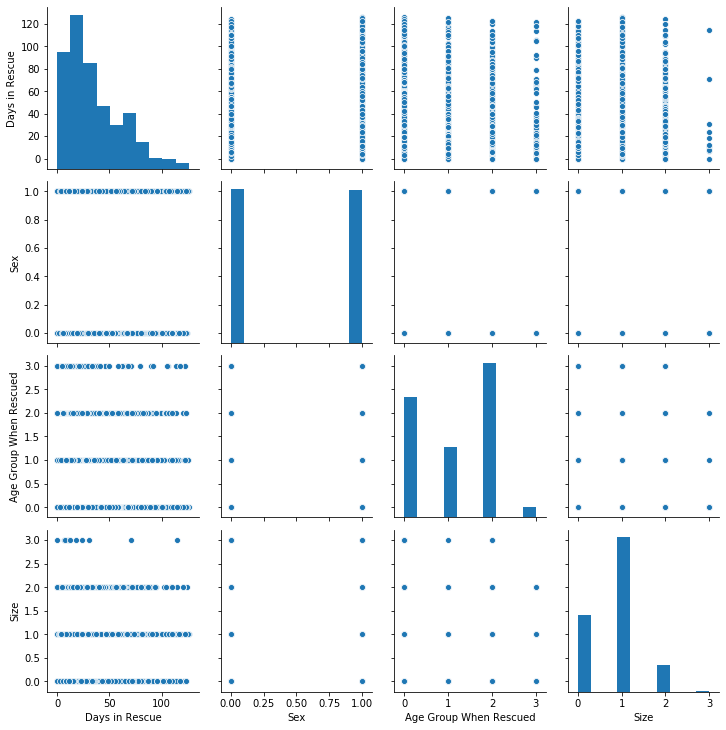

In [52]:
sns.pairplot(data=df)